In [2]:
%matplotlib inline  
import pprint

test_car_id = 1

def get_data_from_file(filename):
    with open(filename, 'r') as results:
        for line in results:
            line = line.split(",")
            
            overhead = float(line[6])
            agent = line[7]
            preference = line[8].replace('\r', '').replace('\n', '')
            
            if agent in agents:
                agent_dict = agents[agent]
            else:
                agent_dict = {}
                agents[agent] = agent_dict
                
            if preference in agent_dict:
                preference_list = agent_dict[preference]
            else:
                preference_list = []
                agent_dict[preference] = preference_list
            
            preference_list.append(overhead)
                    
                    
agents = {}
for i in range(100):
    data = get_data_from_file("results/historical data/overhead_" + str(i) + ".csv")
    
print("data loaded")
# pprint.pprint(agents)
# pprint.pprint(agents["car-"+str(test_car_id)])

data loaded


In [3]:
from statistics import mean 

agents_averages = {}

for agent_name,agent_dict  in agents.iteritems():
    agent_mean_prefs = {}
    for preference, overheads in agent_dict.iteritems():
        agent_mean_prefs[preference] = mean(overheads)
    agents_averages[agent_name] = agent_mean_prefs
    
# pprint.pprint(agents_averages)
pprint.pprint(agents_averages["car-"+str(test_car_id)])

{'balanced': 1.7276098522756873,
 'max_speed': 1.9748140827271106,
 'min_length': 1.717497801691188}


In [4]:
agents_preferences = {}

for agent_name, avg_prefs  in agents_averages.iteritems():
    
    preferred_router = None
    preferred_router_average_overhead = 500
    
    for pref_name, pref_value in avg_prefs.iteritems():
        if pref_value < preferred_router_average_overhead:
            preferred_router = pref_name
            preferred_router_average_overhead = pref_value
    
    agents_preferences[agent_name] = preferred_router
    
print("preferences = {")
for agent_name, avg_pref  in agents_preferences.iteritems():
    print("\t'" + agent_name + "': " + "'" + avg_pref + "',")
print("}")

preferences = {
	'car-477': 'balanced',
	'car-476': 'balanced',
	'car-475': 'balanced',
	'car-474': 'max_speed',
	'car-473': 'balanced',
	'car-472': 'min_length',
	'car-578': 'balanced',
	'car-470': 'balanced',
	'car-576': 'max_speed',
	'car-577': 'balanced',
	'car-574': 'balanced',
	'car-575': 'max_speed',
	'car-572': 'balanced',
	'car-573': 'max_speed',
	'car-570': 'balanced',
	'car-571': 'balanced',
	'car-471': 'balanced',
	'car-579': 'balanced',
	'car-150': 'min_length',
	'car-151': 'max_speed',
	'car-400': 'balanced',
	'car-401': 'max_speed',
	'car-406': 'max_speed',
	'car-407': 'balanced',
	'car-156': 'min_length',
	'car-405': 'min_length',
	'car-158': 'min_length',
	'car-159': 'min_length',
	'car-408': 'min_length',
	'car-409': 'balanced',
	'car-479': 'balanced',
	'car-478': 'balanced',
	'car-275': 'max_speed',
	'car-274': 'max_speed',
	'car-277': 'max_speed',
	'car-276': 'max_speed',
	'car-271': 'max_speed',
	'car-270': 'min_length',
	'car-273': 'balanced',
	'car-272': 'min_len

## Statistics

In [5]:
min_length_count = 0
max_speed_count = 0
balanced_count = 0

for agent_name, avg_prefs  in agents_preferences.iteritems():
    if avg_prefs == 'min_length':
        min_length_count += 1
    if avg_prefs == 'max_speed':
        max_speed_count += 1
    if avg_prefs == 'balanced':
        balanced_count += 1
        
print "min_length: " + str(min_length_count)
print "max_speed: " + str(max_speed_count)
print "balanced: " + str(balanced_count)

min_length: 107
max_speed: 162
balanced: 331


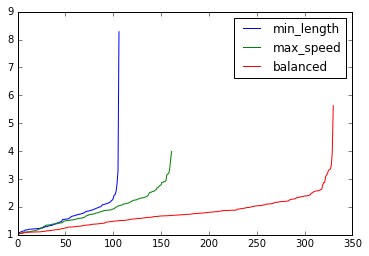

In [6]:
min_length_s = []
max_speed_s = []
balanced_s = []

for agent_name, avg_prefs  in agents_averages.iteritems():
    
    preferred_router = None
    preferred_router_average_overhead = 500
    
    for pref_name, pref_value in avg_prefs.iteritems():
        if pref_value < preferred_router_average_overhead:
            preferred_router = pref_name
            preferred_router_average_overhead = pref_value
    
    if preferred_router == 'min_length':
        min_length_s.append(preferred_router_average_overhead)
    if preferred_router == 'max_speed':
        max_speed_s.append(preferred_router_average_overhead)        
    if preferred_router == 'balanced':
        balanced_s.append(preferred_router_average_overhead)        
        
min_length_s.sort()
max_speed_s.sort()
balanced_s.sort()

import matplotlib.pyplot as plt
plt.plot(min_length_s, label="min_length")
plt.plot(max_speed_s, label="max_speed")
plt.plot(balanced_s, label="balanced")
plt.legend(loc='best')
plt.show()